In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/heart_disease_health_indicators_BRFSS2015.csv")
df 

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack'].astype(int)

## Without Demensional Reduction

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     45957
           1       0.25      0.80      0.38      4779

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736

[[34422 11535]
 [  970  3809]]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     68936
           1       0.25      0.80      0.38      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

[[51511 17425]
 [ 1463  5705]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     91915
           1       0.25      0.80      0.38      9557

    accuracy                           0.75    101472
   macro avg       0.61      0.77      0.61    101472
weighted avg       0.90      0.75      0.80    101472

[[68575 23340]
 [ 1954  7603]]


## Dimensional Reduction

### PCA

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


lrm = LogisticRegression(max_iter=10000, class_weight='balanced')
lrm.fit(X_train_pca, y_train)

y_pred = lrm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     45957
           1       0.24      0.78      0.37      4779

    accuracy                           0.75     50736
   macro avg       0.61      0.76      0.61     50736
weighted avg       0.90      0.75      0.80     50736

[[34358 11599]
 [ 1049  3730]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


lrm = LogisticRegression(max_iter=10000, class_weight='balanced')
lrm.fit(X_train_pca, y_train)

y_pred = lrm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     68936
           1       0.24      0.78      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.76      0.61     76104
weighted avg       0.90      0.75      0.80     76104

[[51471 17465]
 [ 1578  5590]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


lrm = LogisticRegression(max_iter=10000, class_weight='balanced')
lrm.fit(X_train_pca, y_train)

y_pred = lrm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     91915
           1       0.24      0.78      0.37      9557

    accuracy                           0.75    101472
   macro avg       0.61      0.76      0.61    101472
weighted avg       0.90      0.75      0.80    101472

[[68478 23437]
 [ 2075  7482]]


# Multi-Layer Perceptron

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.ops as ops
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

torch.manual_seed(42)
np.random.seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class HeartDiseaseDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

print("Loading dataset...")
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
print(f"Dataset shape: {data.shape}")
print(data.head())

X = data.drop('HeartDiseaseorAttack', axis=1).values
y = data['HeartDiseaseorAttack'].values

Using device: cpu
Loading dataset...


FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_health_indicators_BRFSS2015.csv'

In [23]:
unique, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for value, count in zip(unique, counts):
    print(f"Class {value}: {count} samples ({100 * count / len(y):.2f}%)")

total_size = len(X)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

dataset = HeartDiseaseDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


Class distribution:
Class 0.0: 229787 samples (90.58%)
Class 1.0: 23893 samples (9.42%)


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class HeartDiseaseMLPClassifier(nn.Module):
    def __init__(self, input_size, num_classes=2, class_frequencies=None):
        super(HeartDiseaseMLPClassifier, self).__init__()
        
        self.mlp = ops.MLP(
            in_channels=input_size,
            hidden_channels=[128, 64, 32],  # 3 hidden layers
            norm_layer=nn.BatchNorm1d,      # batch normalization
            activation_layer=nn.ReLU,       # ReLU activation
            dropout=0.3,                    # 30% dropout for regularization
            bias=True
        )
        
        # Output layer for binary classification
        self.classifier = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

        if class_frequencies:
            self.weights = torch.tensor([1.0 / (freq + 1e-7) for freq in class_frequencies], device=device)
        else:
            self.weights = torch.ones(num_classes, device=device)
                
    def forward(self, x):
        x = self.mlp(x)       
        x = self.classifier(x) 
        x = self.sigmoid(x)    
        return x.squeeze(-1)   
    
    def get_weighted_loss(self, outputs, labels):
        # Ensure outputs and labels are on the same device
        outputs = outputs.to(self.weights.device)
        labels = labels.to(self.weights.device)
        labels = labels.float()        
        
        # For binary classification with sigmoid outputs
        criterion = nn.BCELoss(reduction='none')
        loss = criterion(outputs, labels)
        
        # Apply class weights for binary classification
        weighted_loss = torch.zeros_like(loss)
        
        # Class 1 (positive samples)
        positive_mask = (labels == 1)
        if positive_mask.any():
            weighted_loss[positive_mask] = loss[positive_mask] * self.weights[1]
        
        # Class 0 (negative samples)
        negative_mask = (labels == 0)
        if negative_mask.any():
            weighted_loss[negative_mask] = loss[negative_mask] * self.weights[0]
        
        return weighted_loss.mean()

Using device: cpu


## Without weight-balanced

In [27]:
input_features = X.shape[1]  
model = HeartDiseaseMLPClassifier(input_features).to(device)
print(model)

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

HeartDiseaseMLPClassifier(
  (mlp): MLP(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): Dropout(p=0.3, inplace=False)
  )
  (classifier): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [28]:
num_epochs = 20
train_losses = []
val_losses = []
val_aucs = []

print("\nStarting training...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = model(data)
    
        target = target.float()
        output = output.float()    
        loss = criterion(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 0.6899
Epoch: 1/20, Batch: 50/1586, Loss: 0.2444
Epoch: 1/20, Batch: 100/1586, Loss: 0.3659
Epoch: 1/20, Batch: 150/1586, Loss: 0.2561
Epoch: 1/20, Batch: 200/1586, Loss: 0.2546
Epoch: 1/20, Batch: 250/1586, Loss: 0.2226
Epoch: 1/20, Batch: 300/1586, Loss: 0.2958
Epoch: 1/20, Batch: 350/1586, Loss: 0.3165
Epoch: 1/20, Batch: 400/1586, Loss: 0.2802
Epoch: 1/20, Batch: 450/1586, Loss: 0.2850
Epoch: 1/20, Batch: 500/1586, Loss: 0.3040
Epoch: 1/20, Batch: 550/1586, Loss: 0.3082
Epoch: 1/20, Batch: 600/1586, Loss: 0.1681
Epoch: 1/20, Batch: 650/1586, Loss: 0.2659
Epoch: 1/20, Batch: 700/1586, Loss: 0.2841
Epoch: 1/20, Batch: 750/1586, Loss: 0.2347
Epoch: 1/20, Batch: 800/1586, Loss: 0.2712
Epoch: 1/20, Batch: 850/1586, Loss: 0.1981
Epoch: 1/20, Batch: 900/1586, Loss: 0.3458
Epoch: 1/20, Batch: 950/1586, Loss: 0.1936
Epoch: 1/20, Batch: 1000/1586, Loss: 0.2657
Epoch: 1/20, Batch: 1050/1586, Loss: 0.1987
Epoch: 1/20, Batch: 1100/1586, Lo


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.01      0.01     45997
         1.0       0.09      0.99      0.17      4739

    accuracy                           0.10     50736
   macro avg       0.50      0.50      0.09     50736
weighted avg       0.83      0.10      0.03     50736


Confusion Matrix:


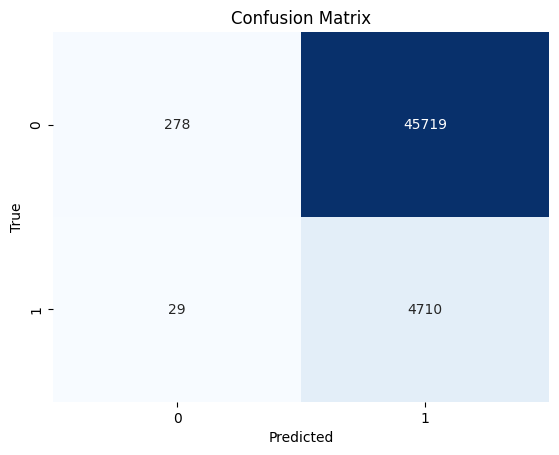

In [34]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        
        y_true.extend(target.cpu().numpy())
        y_pred.extend((output > 0.5).cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Class Weight-Balanced

In [35]:
class_0_frequency = np.sum(y_train == 0) / len(y_train)
class_1_frequency = np.sum(y_train == 1) / len(y_train)
class_frequencies = [class_0_frequency, class_1_frequency]
print(f"Class frequencies: {class_frequencies}")

input_features = X.shape[1]  

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)
print(weighted_model)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

Class frequencies: [0.9058149749966211, 0.09418502500337883]
HeartDiseaseMLPClassifier(
  (mlp): MLP(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): Dropout(p=0.3, inplace=False)
  )
  (classifier): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [36]:
num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.1011
Epoch: 1/20, Batch: 50/1586, Loss: 1.0249
Epoch: 1/20, Batch: 100/1586, Loss: 1.2473
Epoch: 1/20, Batch: 150/1586, Loss: 1.0338
Epoch: 1/20, Batch: 200/1586, Loss: 1.0753
Epoch: 1/20, Batch: 250/1586, Loss: 0.9725
Epoch: 1/20, Batch: 300/1586, Loss: 1.4831
Epoch: 1/20, Batch: 350/1586, Loss: 0.7219
Epoch: 1/20, Batch: 400/1586, Loss: 0.7772
Epoch: 1/20, Batch: 450/1586, Loss: 0.8207
Epoch: 1/20, Batch: 500/1586, Loss: 1.5171
Epoch: 1/20, Batch: 550/1586, Loss: 0.9059
Epoch: 1/20, Batch: 600/1586, Loss: 1.1192
Epoch: 1/20, Batch: 650/1586, Loss: 0.7311
Epoch: 1/20, Batch: 700/1586, Loss: 0.7898
Epoch: 1/20, Batch: 750/1586, Loss: 1.2886
Epoch: 1/20, Batch: 800/1586, Loss: 1.0831
Epoch: 1/20, Batch: 850/1586, Loss: 0.8187
Epoch: 1/20, Batch: 900/1586, Loss: 0.8784
Epoch: 1/20, Batch: 950/1586, Loss: 1.0067
Epoch: 1/20, Batch: 1000/1586, Loss: 0.7972
Epoch: 1/20, Batch: 1050/1586, Loss: 0.9218
Epoch: 1/20, Batch: 1100/1586, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     45997
         1.0       0.23      0.84      0.36      4739

    accuracy                           0.72     50736
   macro avg       0.60      0.77      0.59     50736
weighted avg       0.91      0.72      0.78     50736


Confusion Matrix (Weighted):


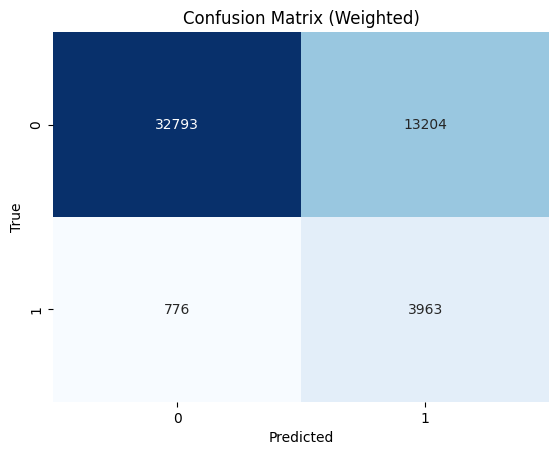

In [38]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model(data)
        
        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

#### train:test = 7:3

In [43]:
total_size = len(X)
train_size = int(0.7 * total_size)
test_size = total_size - train_size

dataset = HeartDiseaseDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X.shape[1]  

weighted_model_2 = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model_2.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

In [44]:
num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model_2.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model_2(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model_2.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1388, Loss: 1.6758
Epoch: 1/20, Batch: 50/1388, Loss: 1.2104
Epoch: 1/20, Batch: 100/1388, Loss: 1.0015
Epoch: 1/20, Batch: 150/1388, Loss: 1.0412
Epoch: 1/20, Batch: 200/1388, Loss: 1.5275
Epoch: 1/20, Batch: 250/1388, Loss: 1.5474
Epoch: 1/20, Batch: 300/1388, Loss: 1.6520
Epoch: 1/20, Batch: 350/1388, Loss: 1.2456
Epoch: 1/20, Batch: 400/1388, Loss: 0.9137
Epoch: 1/20, Batch: 450/1388, Loss: 1.0506
Epoch: 1/20, Batch: 500/1388, Loss: 0.7642
Epoch: 1/20, Batch: 550/1388, Loss: 0.9763
Epoch: 1/20, Batch: 600/1388, Loss: 0.8537
Epoch: 1/20, Batch: 650/1388, Loss: 0.9318
Epoch: 1/20, Batch: 700/1388, Loss: 0.7917
Epoch: 1/20, Batch: 750/1388, Loss: 0.8473
Epoch: 1/20, Batch: 800/1388, Loss: 0.7795
Epoch: 1/20, Batch: 850/1388, Loss: 0.9775
Epoch: 1/20, Batch: 900/1388, Loss: 0.9419
Epoch: 1/20, Batch: 950/1388, Loss: 0.7233
Epoch: 1/20, Batch: 1000/1388, Loss: 1.1763
Epoch: 1/20, Batch: 1050/1388, Loss: 1.2521
Epoch: 1/20, Batch: 1100/1388, Lo


Classification Report (Weighted 2):
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     68886
         1.0       0.23      0.83      0.36      7218

    accuracy                           0.72     76104
   macro avg       0.60      0.77      0.59     76104
weighted avg       0.91      0.72      0.78     76104


Confusion Matrix (Weighted 2):


Text(0.5, 23.52222222222222, 'Predicted')

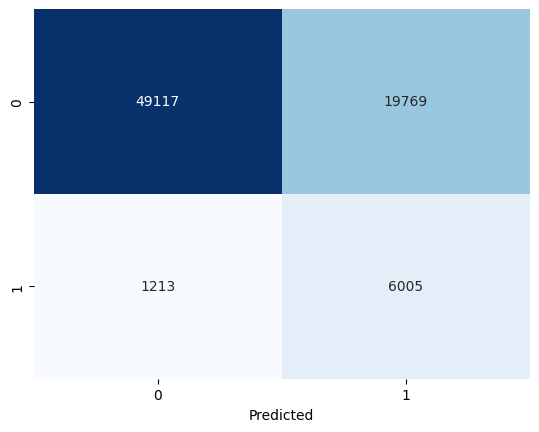

In [45]:
weighted_model_2.eval()

y_true_weighted_2 = []
y_pred_weighted_2 = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model_2(data)
        
        y_true_weighted_2.extend(target.cpu().numpy())
        y_pred_weighted_2.extend((output > 0.5).cpu().numpy())
        
y_true_weighted_2 = np.array(y_true_weighted_2)
y_pred_weighted_2 = np.array(y_pred_weighted_2)

print("\nClassification Report (Weighted 2):")
print(classification_report(y_true_weighted_2, y_pred_weighted_2))
print("\nConfusion Matrix (Weighted 2):")
cm_weighted_2 = confusion_matrix(y_true_weighted_2, y_pred_weighted_2)
sns.heatmap(cm_weighted_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')

#### train:test = 6:4

In [46]:
total_size = len(X)
train_size = int(0.4 * total_size)
test_size = total_size - train_size

dataset = HeartDiseaseDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X.shape[1]  

weighted_model_3 = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model_3.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model_3.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model_3(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model_3.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/793, Loss: 1.6825
Epoch: 1/20, Batch: 50/793, Loss: 0.9463
Epoch: 1/20, Batch: 100/793, Loss: 1.1734
Epoch: 1/20, Batch: 150/793, Loss: 0.8941
Epoch: 1/20, Batch: 200/793, Loss: 1.1621
Epoch: 1/20, Batch: 250/793, Loss: 1.1116
Epoch: 1/20, Batch: 300/793, Loss: 1.0699
Epoch: 1/20, Batch: 350/793, Loss: 1.0761
Epoch: 1/20, Batch: 400/793, Loss: 1.0363
Epoch: 1/20, Batch: 450/793, Loss: 0.8465
Epoch: 1/20, Batch: 500/793, Loss: 0.8409
Epoch: 1/20, Batch: 550/793, Loss: 0.7981
Epoch: 1/20, Batch: 600/793, Loss: 1.1028
Epoch: 1/20, Batch: 650/793, Loss: 1.2010
Epoch: 1/20, Batch: 700/793, Loss: 0.9140
Epoch: 1/20, Batch: 750/793, Loss: 1.1190
Epoch: 1, Train Loss: 1.0429
Epoch: 2/20, Batch: 0/793, Loss: 1.0307
Epoch: 2/20, Batch: 50/793, Loss: 1.1839
Epoch: 2/20, Batch: 100/793, Loss: 0.9581
Epoch: 2/20, Batch: 150/793, Loss: 0.7813
Epoch: 2/20, Batch: 200/793, Loss: 0.8764
Epoch: 2/20, Batch: 250/793, Loss: 0.7880
Epoch: 2/20, Batch: 300/793, Lo


Classification Report (Weighted 3):
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    137846
         1.0       0.23      0.83      0.36     14362

    accuracy                           0.73    152208
   macro avg       0.60      0.77      0.60    152208
weighted avg       0.91      0.73      0.78    152208


Confusion Matrix (Weighted 3):


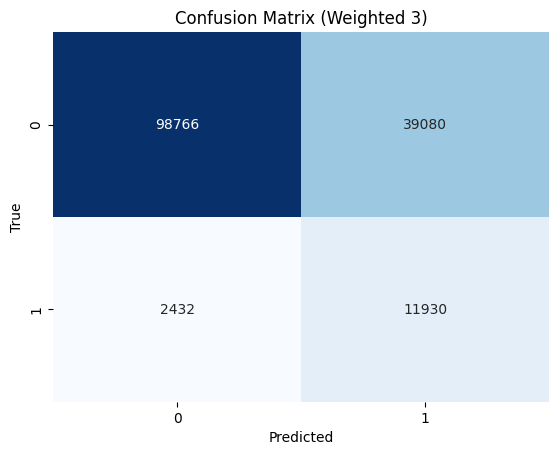

In [47]:
weighted_model_3.eval()

y_true_weighted_3 = []
y_pred_weighted_3 = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model_3(data)
        
        y_true_weighted_3.extend(target.cpu().numpy())
        y_pred_weighted_3.extend((output > 0.5).cpu().numpy())

y_true_weighted_3 = np.array(y_true_weighted_3)
y_pred_weighted_3 = np.array(y_pred_weighted_3)

print("\nClassification Report (Weighted 3):")
print(classification_report(y_true_weighted_3, y_pred_weighted_3))
print("\nConfusion Matrix (Weighted 3):")
cm_weighted_3 = confusion_matrix(y_true_weighted_3, y_pred_weighted_3)
sns.heatmap(cm_weighted_3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted 3)')
plt.show()

## Dimensional Reduction

### train:test = 4:1

#### LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

ldf = LDA(n_components=1)
X_train_lda = ldf.fit_transform(X_train_scaled, y_train)
X_test_lda = ldf.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [12]:
class_0_frequency = np.sum(y_train == 0) / len(y_train)
class_1_frequency = np.sum(y_train == 1) / len(y_train)
class_frequencies = [class_0_frequency, class_1_frequency]
print(f"Class frequencies: {class_frequencies}")

input_features = X_train_pca.shape[1]  

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')


Class frequencies: [0.9058163828445286, 0.09418361715547147]

Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.5682
Epoch: 1/20, Batch: 50/1586, Loss: 0.8826
Epoch: 1/20, Batch: 100/1586, Loss: 1.1600
Epoch: 1/20, Batch: 150/1586, Loss: 1.0792
Epoch: 1/20, Batch: 200/1586, Loss: 0.9174
Epoch: 1/20, Batch: 250/1586, Loss: 1.1077
Epoch: 1/20, Batch: 300/1586, Loss: 1.1989
Epoch: 1/20, Batch: 350/1586, Loss: 0.8814
Epoch: 1/20, Batch: 400/1586, Loss: 0.8287
Epoch: 1/20, Batch: 450/1586, Loss: 1.0642
Epoch: 1/20, Batch: 500/1586, Loss: 0.9467
Epoch: 1/20, Batch: 550/1586, Loss: 0.9247
Epoch: 1/20, Batch: 600/1586, Loss: 1.0495
Epoch: 1/20, Batch: 650/1586, Loss: 1.5008
Epoch: 1/20, Batch: 700/1586, Loss: 1.0473
Epoch: 1/20, Batch: 750/1586, Loss: 0.8844
Epoch: 1/20, Batch: 800/1586, Loss: 1.2075
Epoch: 1/20, Batch: 850/1586, Loss: 0.9924
Epoch: 1/20, Batch: 900/1586, Loss: 1.0415
Epoch: 1/20, Batch: 950/1586, Loss: 0.7825
Epoch: 1/20, Batch: 1000/1586, Loss: 0.8381
Epoch: 1/20, Bat


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     45957
         1.0       0.22      0.83      0.35      4779

    accuracy                           0.70     50736
   macro avg       0.60      0.76      0.58     50736
weighted avg       0.90      0.70      0.76     50736


Confusion Matrix (Weighted):


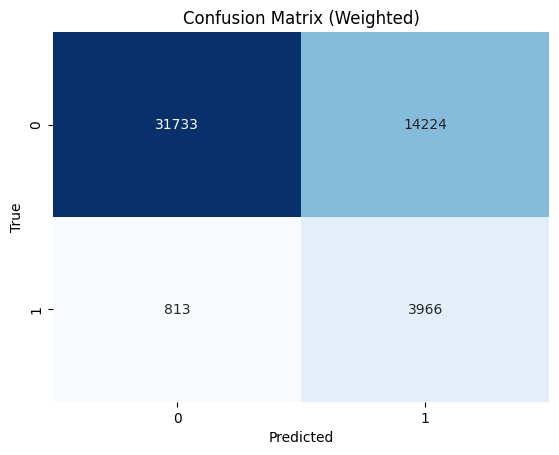

In [13]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model(data)
        
        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

#### PCA(6)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [9]:
class_0_frequency = np.sum(y_train == 0) / len(y_train)
class_1_frequency = np.sum(y_train == 1) / len(y_train)
class_frequencies = [class_0_frequency, class_1_frequency]
print(f"Class frequencies: {class_frequencies}")

input_features = X_train_pca.shape[1]  

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')


Class frequencies: [0.9058163828445286, 0.09418361715547147]

Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.3288
Epoch: 1/20, Batch: 50/1586, Loss: 0.9365
Epoch: 1/20, Batch: 100/1586, Loss: 1.1167
Epoch: 1/20, Batch: 150/1586, Loss: 0.9355
Epoch: 1/20, Batch: 200/1586, Loss: 0.9739
Epoch: 1/20, Batch: 250/1586, Loss: 1.0287
Epoch: 1/20, Batch: 300/1586, Loss: 1.0333
Epoch: 1/20, Batch: 350/1586, Loss: 1.0202
Epoch: 1/20, Batch: 400/1586, Loss: 1.0065
Epoch: 1/20, Batch: 450/1586, Loss: 0.9778
Epoch: 1/20, Batch: 500/1586, Loss: 0.7458
Epoch: 1/20, Batch: 550/1586, Loss: 0.9997
Epoch: 1/20, Batch: 600/1586, Loss: 1.2815
Epoch: 1/20, Batch: 650/1586, Loss: 0.8581
Epoch: 1/20, Batch: 700/1586, Loss: 1.3306
Epoch: 1/20, Batch: 750/1586, Loss: 0.7091
Epoch: 1/20, Batch: 800/1586, Loss: 1.3005
Epoch: 1/20, Batch: 850/1586, Loss: 0.9412
Epoch: 1/20, Batch: 900/1586, Loss: 0.6610
Epoch: 1/20, Batch: 950/1586, Loss: 0.8474
Epoch: 1/20, Batch: 1000/1586, Loss: 0.9335
Epoch: 1/20, Bat


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     45957
         1.0       0.23      0.81      0.35      4779

    accuracy                           0.72     50736
   macro avg       0.60      0.76      0.59     50736
weighted avg       0.90      0.72      0.78     50736


Confusion Matrix (Weighted):


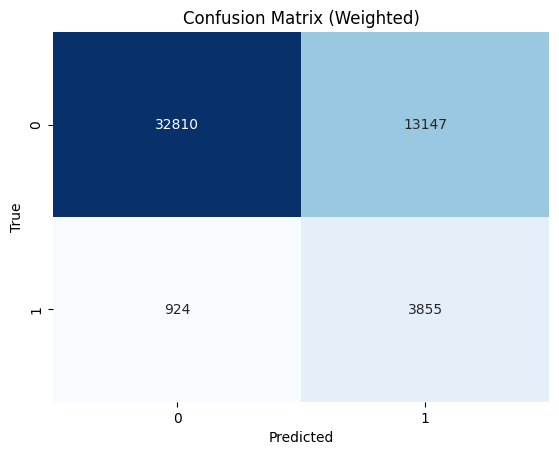

In [10]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model(data)
        
        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

#### PCA(14)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [52]:
input_features = X_train_pca.shape[1]  

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.6164
Epoch: 1/20, Batch: 50/1586, Loss: 1.0990
Epoch: 1/20, Batch: 100/1586, Loss: 0.8676
Epoch: 1/20, Batch: 150/1586, Loss: 0.7939
Epoch: 1/20, Batch: 200/1586, Loss: 1.0151
Epoch: 1/20, Batch: 250/1586, Loss: 0.9033
Epoch: 1/20, Batch: 300/1586, Loss: 0.9121
Epoch: 1/20, Batch: 350/1586, Loss: 1.1611
Epoch: 1/20, Batch: 400/1586, Loss: 1.0669
Epoch: 1/20, Batch: 450/1586, Loss: 1.1088
Epoch: 1/20, Batch: 500/1586, Loss: 1.0694
Epoch: 1/20, Batch: 550/1586, Loss: 0.9989
Epoch: 1/20, Batch: 600/1586, Loss: 0.9732
Epoch: 1/20, Batch: 650/1586, Loss: 1.0244
Epoch: 1/20, Batch: 700/1586, Loss: 0.8831
Epoch: 1/20, Batch: 750/1586, Loss: 0.7434
Epoch: 1/20, Batch: 800/1586, Loss: 1.2029
Epoch: 1/20, Batch: 850/1586, Loss: 0.6659
Epoch: 1/20, Batch: 900/1586, Loss: 1.2023
Epoch: 1/20, Batch: 950/1586, Loss: 0.8830
Epoch: 1/20, Batch: 1000/1586, Loss: 1.0838
Epoch: 1/20, Batch: 1050/1586, Loss: 0.6963
Epoch: 1/20, Batch: 1100/1586, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     45957
         1.0       0.23      0.82      0.36      4779

    accuracy                           0.73     50736
   macro avg       0.60      0.77      0.60     50736
weighted avg       0.90      0.73      0.78     50736


Confusion Matrix (Weighted):


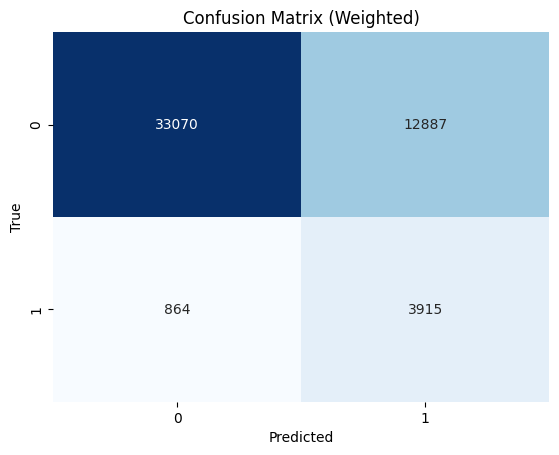

In [53]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model(data)
        
        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

### train:test = 7:3

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X_train_pca.shape[1]  

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1388, Loss: 1.6448
Epoch: 1/20, Batch: 50/1388, Loss: 0.8332
Epoch: 1/20, Batch: 100/1388, Loss: 0.9874
Epoch: 1/20, Batch: 150/1388, Loss: 0.9608
Epoch: 1/20, Batch: 200/1388, Loss: 1.2987
Epoch: 1/20, Batch: 250/1388, Loss: 1.1182
Epoch: 1/20, Batch: 300/1388, Loss: 1.3456
Epoch: 1/20, Batch: 350/1388, Loss: 1.1925
Epoch: 1/20, Batch: 400/1388, Loss: 0.7892
Epoch: 1/20, Batch: 450/1388, Loss: 0.9442
Epoch: 1/20, Batch: 500/1388, Loss: 1.3185
Epoch: 1/20, Batch: 550/1388, Loss: 0.8292
Epoch: 1/20, Batch: 600/1388, Loss: 1.2458
Epoch: 1/20, Batch: 650/1388, Loss: 1.1959
Epoch: 1/20, Batch: 700/1388, Loss: 1.1307
Epoch: 1/20, Batch: 750/1388, Loss: 1.2695
Epoch: 1/20, Batch: 800/1388, Loss: 0.8949
Epoch: 1/20, Batch: 850/1388, Loss: 0.9881
Epoch: 1/20, Batch: 900/1388, Loss: 0.8534
Epoch: 1/20, Batch: 950/1388, Loss: 1.3633
Epoch: 1/20, Batch: 1000/1388, Loss: 0.8087
Epoch: 1/20, Batch: 1050/1388, Loss: 0.9534
Epoch: 1/20, Batch: 1100/1388, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.81     68936
         1.0       0.22      0.83      0.35      7168

    accuracy                           0.71     76104
   macro avg       0.60      0.77      0.58     76104
weighted avg       0.91      0.71      0.77     76104


Confusion Matrix (Weighted):


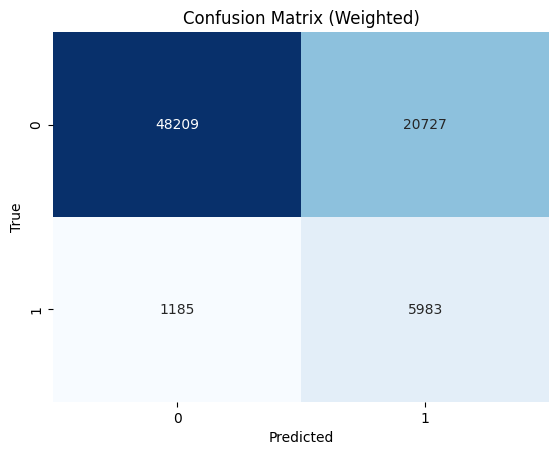

In [55]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model(data)
        
        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

### train:test = 6:4

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X_train_pca.shape[1]  

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        output = weighted_model(data)
    
        target = target.float()
        output = output.float()    
        loss = weighted_model.get_weighted_loss(output, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)
    
    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1190, Loss: 1.3539
Epoch: 1/20, Batch: 50/1190, Loss: 1.1146
Epoch: 1/20, Batch: 100/1190, Loss: 0.9146
Epoch: 1/20, Batch: 150/1190, Loss: 1.0458
Epoch: 1/20, Batch: 200/1190, Loss: 0.9952
Epoch: 1/20, Batch: 250/1190, Loss: 0.8527
Epoch: 1/20, Batch: 300/1190, Loss: 1.0107
Epoch: 1/20, Batch: 350/1190, Loss: 1.4752
Epoch: 1/20, Batch: 400/1190, Loss: 0.9263
Epoch: 1/20, Batch: 450/1190, Loss: 0.8552
Epoch: 1/20, Batch: 500/1190, Loss: 0.6298
Epoch: 1/20, Batch: 550/1190, Loss: 1.0326
Epoch: 1/20, Batch: 600/1190, Loss: 0.7615
Epoch: 1/20, Batch: 650/1190, Loss: 1.3143
Epoch: 1/20, Batch: 700/1190, Loss: 0.7878
Epoch: 1/20, Batch: 750/1190, Loss: 0.7185
Epoch: 1/20, Batch: 800/1190, Loss: 1.0536
Epoch: 1/20, Batch: 850/1190, Loss: 1.1834
Epoch: 1/20, Batch: 900/1190, Loss: 0.9659
Epoch: 1/20, Batch: 950/1190, Loss: 0.9442
Epoch: 1/20, Batch: 1000/1190, Loss: 1.2166
Epoch: 1/20, Batch: 1050/1190, Loss: 0.8207
Epoch: 1/20, Batch: 1100/1190, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     91915
         1.0       0.22      0.85      0.35      9557

    accuracy                           0.70    101472
   macro avg       0.60      0.77      0.58    101472
weighted avg       0.91      0.70      0.76    101472


Confusion Matrix (Weighted):


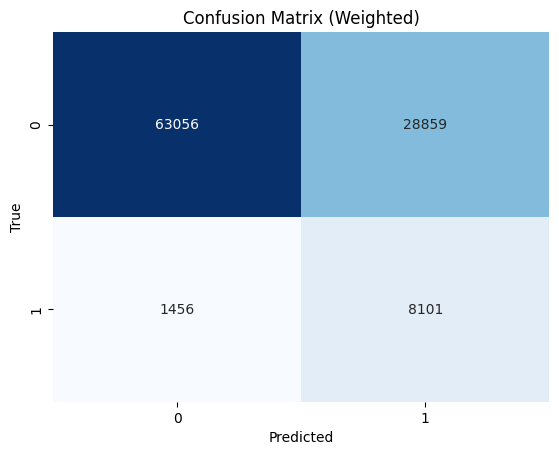

In [57]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        output = weighted_model(data)
        
        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()